In [1]:
import pandas as pd
import networkx as nx
print(nx.__version__)
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from utils import *
from plot_utils import *
from metrics import *

import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

2.5


# Load Dataset

In [40]:
data_download()

Download completed


In [41]:
#specifica country, base è italy
match_id2match, match_id2events, player_id2player, competition_id2competition, team_id2team = load_public_dataset(data_folder=data_folder, tournament = 'Italy')

In [43]:
partite = pd.read_json('matches_Italy.json')

In [45]:
partite

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406278,38,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",181248,2018-05-20 18:45:00,3161,,2576335,"Lazio - Internazionale, 2 - 3","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524
1,Played,4406278,38,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",181248,2018-05-20 18:45:00,3158,MAPEI Stadium - Citt\u00e0 del Tricolore,2576336,"Sassuolo - Roma, 0 - 1","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377255, 'role': 'referee'}, {'r...",Regular,524
2,Played,4406278,38,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",181248,2018-05-20 16:00:00,3173,,2576329,"Cagliari - Atalanta, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377247, 'role': 'referee'}, {'r...",Regular,524
3,Played,4406278,38,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",181248,2018-05-20 16:00:00,3165,,2576330,"Chievo - Benevento, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377246, 'role': 'referee'}, {'r...",Regular,524
4,Played,4406278,38,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",181248,2018-05-20 16:00:00,3163,,2576331,"Udinese - Bologna, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4406278,1,"{'3315': {'scoreET': 0, 'coachId': 261661, 'si...",181248,2017-08-20 18:45:00,0,MAPEI Stadium - Citt\u00e0 del Tricolore,2575967,"Sassuolo - Genoa, 0 - 0","August 20, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 377233, 'role': 'referee'}, {'r...",Regular,524
376,Played,4406278,1,"{'3165': {'scoreET': 0, 'coachId': 21603, 'sid...",181248,2017-08-20 18:45:00,3165,Dacia Arena,2575968,"Udinese - Chievo, 1 - 2","August 20, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524
377,Played,4406278,1,"{'3172': {'scoreET': 0, 'coachId': 210116, 'si...",181248,2017-08-20 16:00:00,3158,Stadio Atleti Azzurri d'Italia,2575959,"Atalanta - Roma, 0 - 1","August 20, 2017 at 6:00:00 PM GMT+2","[{'refereeId': 377248, 'role': 'referee'}, {'r...",Regular,524
378,Played,4406278,1,"{'3194': {'scoreET': 0, 'coachId': 270032, 'si...",181248,2017-08-19 18:45:00,3187,Stadio Marc'Antonio Bentegodi,2575962,"Hellas Verona - Napoli, 1 - 3","August 19, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 377252, 'role': 'referee'}, {'r...",Regular,524


In [65]:
match_id = 2575959 # a single match in Italy
match_events = match_id2events[match_id]
match_label = match_id2match[match_id]['label']
            
match_df = pd.DataFrame(match_events)

match_df = match_df[match_df['subEventName'] != 'Corner']

In [66]:
match_df['teamId'].unique()

array([3158, 3172], dtype=int64)

In [67]:
#prova un team
match_df1 = match_df[match_df['teamId'] == 3158]

match_df1['x_start'] = [x[0]['x'] for x in match_df1['positions']]
match_df1['y_start'] = [x[0]['y'] for x in match_df1['positions']]
match_df1.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x_start,y_start
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957,49,52
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958,43,44
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959,36,17
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960,78,56
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961,64,15


In [68]:
#prova un team
match_df2 = match_df[match_df['teamId'] == 3172]

match_df2['x_start'] = [x[0]['x'] for x in match_df2['positions']]
match_df2['y_start'] = [x[0]['y'] for x in match_df2['positions']]
match_df2.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x_start,y_start
7,1,Ground defending duel,"[{'id': 504}, {'id': 701}, {'id': 1802}]",86366,"[{'y': 85, 'x': 36}, {'y': 75, 'x': 28}]",2575959,Duel,3172,1H,11.527556,12,180423976,36,85
8,1,Ground defending duel,"[{'id': 601}, {'id': 701}, {'id': 1802}]",20404,"[{'y': 75, 'x': 28}, {'y': 36, 'x': 18}]",2575959,Duel,3172,1H,12.156579,12,180423977,28,75
10,8,Simple pass,[{'id': 1801}],86366,"[{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]",2575959,Pass,3172,1H,16.240563,85,180423979,38,82
11,7,Touch,[],246175,"[{'y': 88, 'x': 43}, {'y': 88, 'x': 39}]",2575959,Others on the ball,3172,1H,17.251513,72,180423982,43,88
13,1,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",246175,"[{'y': 88, 'x': 39}, {'y': 85, 'x': 39}]",2575959,Duel,3172,1H,17.791970,13,180423983,39,88


In [69]:
#DIZIONARIO player:posizione media tupla coordinate xy
avg_position = round(match_df1.groupby('playerId')['x_start','y_start'].mean(), 2)
avg_position['pos'] = list(zip(avg_position.x_start, avg_position.y_start)) 
avg_position.drop(['x_start', 'y_start'], axis = 1, inplace=True)
avg_position['playerId'] = avg_position.index
avg_position = dict(zip(avg_position.playerId, avg_position.pos))

In [70]:
avg = {}
for node, pos in avg_position.items():
    if node == 0:
        pass
    else:
        avg[player_id2player[node]['shortName'].encode('ascii', 'strict').decode('unicode-escape')] = pos

In [71]:
avg #NAPOLI

{'K. Strootman': (56.52, 57.66),
 'F. Fazio': (24.0, 54.5),
 'D. Perotti': (63.98, 26.54),
 'A. Kolarov': (47.92, 16.31),
 'E. Džeko': (64.31, 45.26),
 'S. El Shaarawy': (52.5, 13.38),
 'D. De Rossi': (47.1, 49.37),
 'Juan Jesus': (33.89, 26.75),
 'R. Nainggolan': (59.49, 48.49),
 'G. Defrel': (57.62, 81.31),
 'Bruno Peres': (45.39, 87.56),
 'K. Manolas': (27.98, 65.36),
 'Alisson': (52.76, 75.79),
 'L. Pellegrini': (25.33, 89.33)}

In [72]:
avg_position2 = round(match_df2.groupby('playerId')['x_start','y_start'].mean(), 2)
avg_position2['pos'] = list(zip(avg_position2.x_start, avg_position2.y_start)) 
avg_position2.drop(['x_start', 'y_start'], axis = 1, inplace=True)
avg_position2['playerId'] = avg_position2.index
avg_position2 = dict(zip(avg_position2.playerId, avg_position2.pos))

In [73]:
avg2 = {}
for node, pos in avg_position2.items():
    if node == 0:
        pass
    else:
        avg2[player_id2player[node]['shortName'].encode('ascii', 'strict').decode('unicode-escape')] = pos

In [74]:
avg2 #JUVE

{'M. de Roon': (57.07, 62.87),
 'B. Cristante': (45.69, 72.64),
 'J. Iličić': (65.83, 60.14),
 'A. Masiello': (36.81, 24.48),
 'A. Gómez': (69.83, 22.05),
 'J. Kurtič': (52.64, 63.64),
 'Rafael Tolói': (41.84, 74.43),
 'R. Freuler': (52.58, 29.41),
 'E. Berisha': (7.52, 36.24),
 'J. Palomino': (36.19, 48.06),
 'A. Cornelius': (68.86, 48.86),
 'A. Petagna': (65.84, 57.7),
 'H. Hateboer': (52.3, 90.05),
 'R. Gosens': (53.08, 13.91)}

# Graph

In [81]:
def passing_networks(match_id=2575959):
    """
    Construct the passing networks of the teams in the match.
    
    Parameters
    ----------
    match_id : int, optional
        identifier of the match to plot
        
    Returns
    -------
    tuple
        the two constructed networks, as networkx objects.
    """
    
    # take the names of the two teams of the match
    match_label = match_id2match[match_id]['label']
    team1_name = match_label.split('-')[0].split(' ')[0]
    team2_name = match_label.split('-')[1].split(' ')[1].split(',')[0]
    
    # take all the events of the match
    match_events = []
    for event in match_id2events[match_id]:
        if event['eventName'] == 'Pass':
            match_events.append(event)

    match_events_df = pd.DataFrame(match_events)
    first_half_max_duration = np.max(match_events_df[match_events_df['matchPeriod'] == '1H']['eventSec'])

    # sum 1H time end to all the time in 2H
    for event in match_events:
        if event['matchPeriod'] == '2H':
            event['eventSec'] += first_half_max_duration
    
    team2pass2weight = defaultdict(lambda: defaultdict(int))
    send = []
    receive = []
    for event, next_event, next_next_event in zip(match_events, match_events[1:], match_events[2:]):
        try:
            if event['eventName'] == 'Pass' and ACCURATE_PASS in [tag['id'] for tag in event['tags']]:
                sender = player_id2player[event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                send.append(sender)
                # case of duel
                if next_event['eventName'] == 'Duel':
                    # if the next event of from a playero of the same tema
                    if next_event['teamId'] == event['teamId']:
                        receiver = player_id2player[next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                        receive.append(receive)
                    else:
                        receiver = player_id2player[next_next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                        receive.append(receive)
                else:  # any other event 
                    if next_event['teamId'] == event['teamId']:
                        receiver = player_id2player[next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                        receive.append(receive)
        except KeyError:
            pass
    # craete networkx graphs
    G1, G2 = nx.DiGraph(team=team1_name), nx.DiGraph(team=team2_name)
    for (sender, receiver), weight in team2pass2weight[team1_name].items():
        G1.add_edge(sender, receiver, weight=weight)
    for (sender, receiver), weight in team2pass2weight[team2_name].items():
        G2.add_edge(sender, receiver, weight=weight)    
    
    return G1, G2

In [82]:
G1, G2 = passing_networks(match_id=2575959)

In [87]:
nx.set_node_attributes(G1, avg2, 'pos')
nx.set_node_attributes(G2, avg, 'pos')

In [88]:
def plot_passing_networks(G1, G2):
    """
    Plot the two passing networks in input.
    
    Parameters
    ----------
    G1 : networkx object
        the object representing the first network
        
    G2 : networkx object
        the object representing the second network
    """
    fig, ax = pitch_graph_zone()
    
    #pos1 = nx.spring_layout(G1, 4)
    #pos2 = nx.spring_layout(G2, 4)
    nome2degree = dict(G1.degree)
    nx.draw(G1, pos=nx.get_node_attributes(G1, 'pos'), nodelist=list(nome2degree.keys()), 
            node_size=[deg * 50 for deg in nome2degree.values()], 
            node_color='red', edge_color='black',
            with_labels=True, font_weight='bold', alpha=0.75)
    plt.show()
    
    nome2degree = dict(G2.degree)
    nx.draw(G2, pos=nx.get_node_attributes(G2, 'pos'), nodelist=list(nome2degree.keys()), 
            node_size=[deg * 50 for deg in nome2degree.values()],
            node_color='blue', edge_color='black',
            with_labels=True, font_weight='bold', alpha=0.75)
    plt.show()

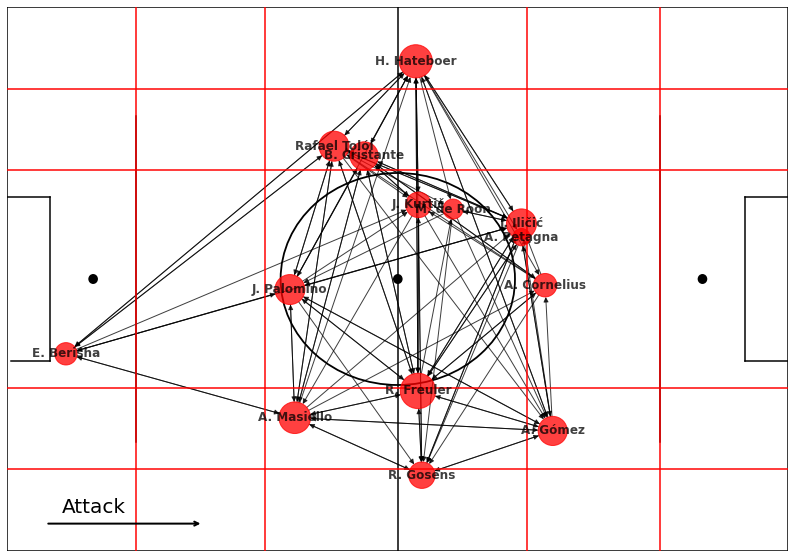

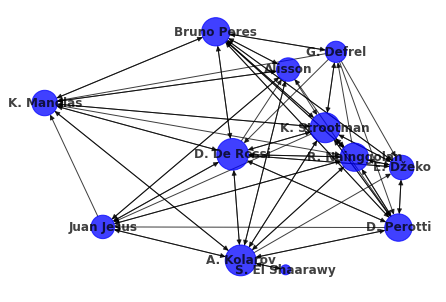

In [89]:
plot_passing_networks(G1, G2)

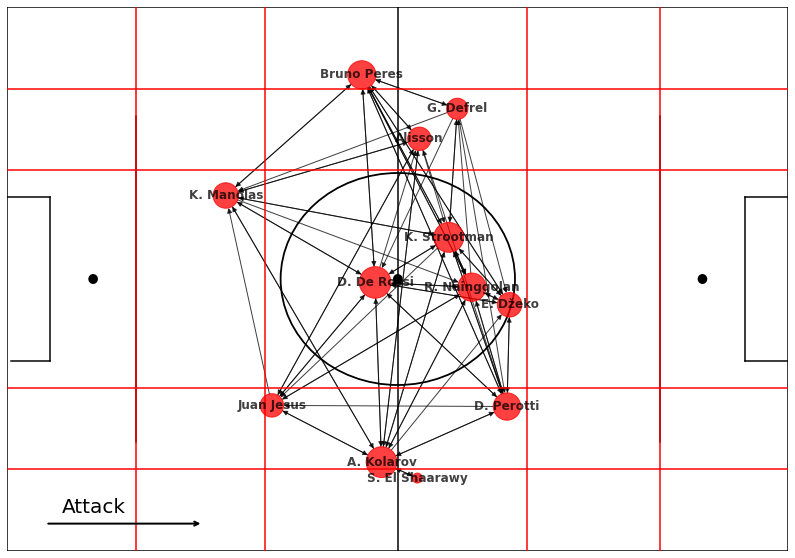

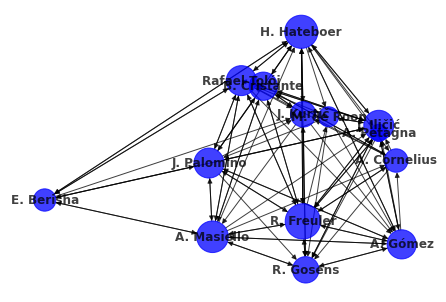

In [90]:
plot_passing_networks(G2, G1)

# Pitch zone nodes

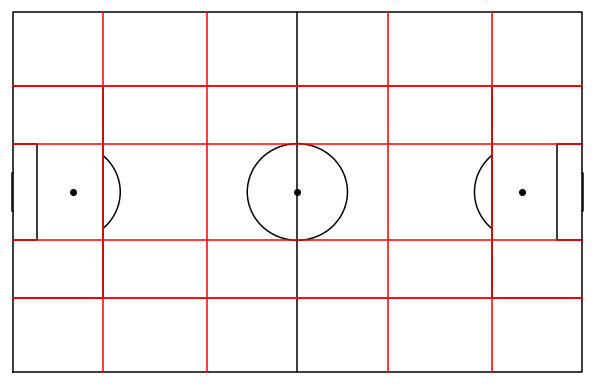

In [36]:
draw_pitch_graph_zone("white", "black", "h", "full")

In [39]:
centroids = {'zone 1':(8.25, 61.08), 'zone 2':(8.25, 48.66), 'zone 3':(8.25, 34), 'zone 4':(8.25, 19.34), 'zone 5':(8.25, 6.92), 'zone 6': (26, 61.08), 'zone 7': (26, 48.66), 'zone 8': (26, 34), 'zone 9': (26, 19.34), 'zone 10': (26, 6.92), 'zone 11': (43.75, 61.08), 'zone 12': (43.75, 48.66), 'zone 13': (43.75, 34), 'zone 14': (43.75, 19.34), 'zone 15': (43.75, 6.92), 'zone 16': (60.25, 61.08), 'zone 17': (60.25, 48.66), 'zone 18': (60.25, 34), 'zone 19': (60.25, 19.34), 'zone 20': (60.25, 6.92), 'zone 21': (78, 61.08), 'zone 22': (78, 48.66), 'zone 23': (78, 34), 'zone 24': (78, 19.34), 'zone 25': (78, 6.92), 'zone 26': (93.75, 61.08), 'zone 27': (93.75, 48.66), 'zone 28': (93.75, 34), 'zone 29': (93.75, 19.34), 'zone 30': (93.75, 6.92)}

In [40]:
centroids

{'zone 1': (8.25, 61.08),
 'zone 2': (8.25, 48.66),
 'zone 3': (8.25, 34),
 'zone 4': (8.25, 19.34),
 'zone 5': (8.25, 6.92),
 'zone 6': (26, 61.08),
 'zone 7': (26, 48.66),
 'zone 8': (26, 34),
 'zone 9': (26, 19.34),
 'zone 10': (26, 6.92),
 'zone 11': (43.75, 61.08),
 'zone 12': (43.75, 48.66),
 'zone 13': (43.75, 34),
 'zone 14': (43.75, 19.34),
 'zone 15': (43.75, 6.92),
 'zone 16': (60.25, 61.08),
 'zone 17': (60.25, 48.66),
 'zone 18': (60.25, 34),
 'zone 19': (60.25, 19.34),
 'zone 20': (60.25, 6.92),
 'zone 21': (78, 61.08),
 'zone 22': (78, 48.66),
 'zone 23': (78, 34),
 'zone 24': (78, 19.34),
 'zone 25': (78, 6.92),
 'zone 26': (93.75, 61.08),
 'zone 27': (93.75, 48.66),
 'zone 28': (93.75, 34),
 'zone 29': (93.75, 19.34),
 'zone 30': (93.75, 6.92)}

In [35]:
match_id = 2576335 # a single match in Italy
match_events = match_id2events[match_id]
match_label = match_id2match[match_id]['label']
            
match_df = pd.DataFrame(match_events)
match_df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3344,"[{'y': 50, 'x': 49}, {'y': 58, 'x': 38}]",2576335,Pass,3161,1H,2.417590,85,253668302
1,8,Simple pass,[{'id': 1801}],116349,"[{'y': 58, 'x': 38}, {'y': 91, 'x': 37}]",2576335,Pass,3161,1H,3.904412,85,253668303
2,8,Simple pass,[{'id': 1801}],135903,"[{'y': 91, 'x': 37}, {'y': 72, 'x': 34}]",2576335,Pass,3161,1H,6.484211,85,253668304
3,8,Simple pass,[{'id': 1801}],138408,"[{'y': 72, 'x': 34}, {'y': 14, 'x': 36}]",2576335,Pass,3161,1H,10.043835,85,253668306
4,8,Simple pass,[{'id': 1801}],21094,"[{'y': 14, 'x': 36}, {'y': 39, 'x': 30}]",2576335,Pass,3161,1H,14.032070,85,253668308


In [36]:
df1 = match_df[match_df['eventName'] == 'Pass']
df2 = match_df[match_df['eventName'] == 'Shot']
df = pd.concat([df1, df2])

In [38]:
match_df

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3344,"[{'y': 50, 'x': 49}, {'y': 58, 'x': 38}]",2576335,Pass,3161,1H,2.417590,85,253668302
1,8,Simple pass,[{'id': 1801}],116349,"[{'y': 58, 'x': 38}, {'y': 91, 'x': 37}]",2576335,Pass,3161,1H,3.904412,85,253668303
2,8,Simple pass,[{'id': 1801}],135903,"[{'y': 91, 'x': 37}, {'y': 72, 'x': 34}]",2576335,Pass,3161,1H,6.484211,85,253668304
3,8,Simple pass,[{'id': 1801}],138408,"[{'y': 72, 'x': 34}, {'y': 14, 'x': 36}]",2576335,Pass,3161,1H,10.043835,85,253668306
4,8,Simple pass,[{'id': 1801}],21094,"[{'y': 14, 'x': 36}, {'y': 39, 'x': 30}]",2576335,Pass,3161,1H,14.032070,85,253668308
...,...,...,...,...,...,...,...,...,...,...,...,...
1615,8,Simple pass,[{'id': 1802}],376362,"[{'y': 5, 'x': 72}, {'y': 16, 'x': 41}]",2576335,Pass,3162,2H,2927.816503,85,253670015
1616,8,Smart pass,"[{'id': 901}, {'id': 1802}]",206314,"[{'y': 84, 'x': 59}, {'y': 70, 'x': 65}]",2576335,Pass,3161,2H,2930.851111,86,253670075
1617,8,Simple pass,"[{'id': 1401}, {'id': 1801}]",37745,"[{'y': 30, 'x': 35}, {'y': 12, 'x': 27}]",2576335,Pass,3162,2H,2931.812411,85,253670019
1618,1,Ground attacking duel,"[{'id': 503}, {'id': 701}, {'id': 1802}]",40806,"[{'y': 12, 'x': 27}, {'y': 0, 'x': 0}]",2576335,Duel,3162,2H,2936.110430,11,253670021


In [25]:
df['x_start'] = [x[0]['x'] for x in df['positions']]
df['y_start'] = [x[0]['y'] for x in df['positions']]
df['x_end'] = [x[1]['x'] for x in df['positions']]
df['y_end'] = [x[1]['y'] for x in df['positions']]

In [26]:
df #shot e pass del match

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x_start,y_start,x_end,y_end
0,8,Simple pass,[{'id': 1801}],3344,"[{'y': 50, 'x': 49}, {'y': 58, 'x': 38}]",2576335,Pass,3161,1H,2.417590,85,253668302,49,50,38,58
1,8,Simple pass,[{'id': 1801}],116349,"[{'y': 58, 'x': 38}, {'y': 91, 'x': 37}]",2576335,Pass,3161,1H,3.904412,85,253668303,38,58,37,91
2,8,Simple pass,[{'id': 1801}],135903,"[{'y': 91, 'x': 37}, {'y': 72, 'x': 34}]",2576335,Pass,3161,1H,6.484211,85,253668304,37,91,34,72
3,8,Simple pass,[{'id': 1801}],138408,"[{'y': 72, 'x': 34}, {'y': 14, 'x': 36}]",2576335,Pass,3161,1H,10.043835,85,253668306,34,72,36,14
4,8,Simple pass,[{'id': 1801}],21094,"[{'y': 14, 'x': 36}, {'y': 39, 'x': 30}]",2576335,Pass,3161,1H,14.032070,85,253668308,36,14,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,10,Shot,"[{'id': 402}, {'id': 1216}, {'id': 1802}]",69968,"[{'y': 34, 'x': 69}, {'y': 100, 'x': 100}]",2576335,Shot,3161,2H,1717.530780,100,253669804,69,34,100,100
1411,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",352993,"[{'y': 30, 'x': 77}, {'y': 100, 'x': 100}]",2576335,Shot,3161,2H,2076.501174,100,253669906,77,30,100,100
1415,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1203}, {'id'...",352993,"[{'y': 31, 'x': 91}, {'y': 100, 'x': 100}]",2576335,Shot,3161,2H,2080.301666,100,253669909,91,31,100,100
1422,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",116349,"[{'y': 59, 'x': 92}, {'y': 100, 'x': 100}]",2576335,Shot,3161,2H,2144.723641,100,253669918,92,59,100,100


In [34]:
df[df['x_end'] == None]

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x_start,y_start,x_end,y_end
